In [169]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties import unumpy as unp

v_inc = 1490

The transverse wave amplitude is measured only at angles without a longitudinal component in order to avoid superimposition effects.

In [170]:
def linregress_between(xs, ys, fit_range):
    mask = np.where((xs >= fit_range[0])&(xs <= fit_range[1]))

    linreg = linregress(xs[mask], ys[mask])
    
    plt.plot(xs_plot:=np.array([0,90]), linreg.slope*xs_plot+linreg.intercept, c='grey', ls='--')

    a = ufloat(linreg.slope, linreg.stderr)
    b = ufloat(linreg.intercept, linreg.intercept_stderr)
    x_intercept = -b/a

    # plt.plot(x_intercept.n,0,'o')
    plt.text(x_intercept.n-30,0.03,rf'$\phi=${x_intercept:.2f}$\degree$')
    return x_intercept
    

37.6+/-1.7	83+/-5	42.5+/-1.2
(2.44+/-0.10)e+03	1502+/-18	(1.56+/-0.04)e+03
nu= 0.20+/-0.04
G= (2.71+/-0.06)e+03
E= (6.48+/-0.23)e+03


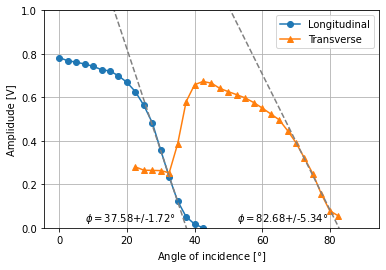

In [171]:
with open('acrylic.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    header = next(reader)
    long_angles, tran_angles, longs, trans = [], [], [], []
    for row in reader:
        angle, long, tran = row
        if long:
            longs.append(float(long))
            long_angles.append(float(angle))
        if tran:
            trans.append(float(tran))
            tran_angles.append(float(angle))

long_angles, tran_angles, longs, trans = np.array(long_angles), np.array(tran_angles), np.array(longs), np.array(trans)

plt.plot(long_angles, longs, '-o', label = 'Longitudinal')
plt.plot(tran_angles, trans, '-^', label = 'Transverse')

phi_L = linregress_between(long_angles, longs, (30,35))
phi_T = linregress_between(tran_angles, trans, (69.9,78))
Phi = ufloat(42.5, 2.5/2)

print(f'{phi_L}\t{phi_T}\t{Phi}')

phi_L, phi_T, Phi = phi_L/180*np.pi, phi_T/180*np.pi, Phi/180*np.pi

v_L = v_inc / unp.sin(phi_L)
v_T1 = v_inc / unp.sin(phi_T)
v_T2 = v_inc / unp.sin(Phi)/np.sqrt(2)

print(f'{v_L}\t{v_T1}\t{v_T2}')

y = v_L/v_T1

nu = (2-y**2)/(2-2*y**2)
print('nu=',nu)
# print(round((nu.n-.31)/.31*100,1),'\%')

rho = 1200

G = v_T1**2 * rho /1e6
print('G=',G)
# print(round((G.n-26000)/26000*100,1),'\%')

E = v_L**2 * rho * (1+nu)*(1-2*nu)/(1-nu) /1e6
print('E=',E)
# print(round((E.n-68000)/68000*100,1),'\%')

plt.ylim(0,1)

plt.grid()

plt.xlabel(r'Angle of incidence [$\degree$]')
plt.ylabel('Amplidude [V]')
plt.legend()
# plt.scatter(np.sin(long_angles/180*np.pi), longs)
plt.savefig('Acrylic.png')

In [172]:
def linregress_between(xs, ys, fit_range):
    mask = np.where((xs >= fit_range[0])&(xs <= fit_range[1]))

    linreg = linregress(xs[mask], ys[mask])
    
    plt.plot(xs_plot:=np.array([0,90]), linreg.slope*xs_plot+linreg.intercept, c='grey', ls='--')

    a = ufloat(linreg.slope, linreg.stderr)
    b = ufloat(linreg.intercept, linreg.intercept_stderr)
    x_intercept = -b/a

    # plt.plot(x_intercept.n,0,'o')
    plt.text(x_intercept.n-13,0.03,rf'$\phi=${x_intercept:.2f}$\degree$')
    return x_intercept
    

13.8+/-1.2	29.9+/-2.1	17.5+/-1.2
(6.2+/-0.5)e+03	(2.99+/-0.19)e+03	(3.50+/-0.24)e+03
nu= 0.35+/-0.04
G= (2.41+/-0.31)e+04
E= (6.5+/-0.7)e+04


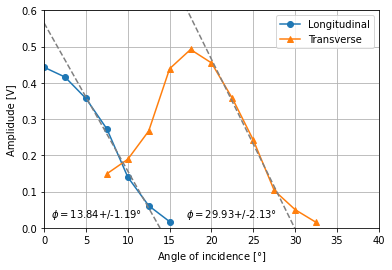

In [173]:
with open('aluminium.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    header = next(reader)
    long_angles, tran_angles, longs, trans = [], [], [], []
    for row in reader:
        angle, long, tran = row
        if long:
            longs.append(float(long))
            long_angles.append(float(angle))
        if tran:
            trans.append(float(tran))
            tran_angles.append(float(angle))

long_angles, tran_angles, longs, trans = np.array(long_angles), np.array(tran_angles), np.array(longs), np.array(trans)

plt.plot(long_angles, longs, '-o', label = 'Longitudinal')
plt.plot(tran_angles, trans, '-^', label = 'Transverse')

phi_L = linregress_between(long_angles, longs, (4,13))
phi_T = linregress_between(tran_angles, trans, (19,29))
Phi = ufloat(17.5, 2.5/2)

print(f'{phi_L}\t{phi_T}\t{Phi}')

phi_L, phi_T, Phi = phi_L/180*np.pi, phi_T/180*np.pi, Phi/180*np.pi

v_L = v_inc / unp.sin(phi_L)
v_T1 = v_inc / unp.sin(phi_T)
v_T2 = v_inc / unp.sin(Phi)/np.sqrt(2)

print(f'{v_L}\t{v_T1}\t{v_T2}')

y = v_L/v_T1

nu = (2-y**2)/(2-2*y**2)
print('nu=',nu)
# print(round((nu.n-.31)/.31*100,1),'\%')

rho = 2700

G = v_T1**2 * rho /1e6
print('G=',G)
# print(round((G.n-26000)/26000*100,1),'\%')

E = v_L**2 * rho * (1+nu)*(1-2*nu)/(1-nu) /1e6
print('E=',E)
# print(round((E.n-68000)/68000*100,1),'\%')

plt.ylim(0,.6)
plt.xlim(0,40)

plt.grid()

plt.xlabel(r'Angle of incidence [$\degree$]')
plt.ylabel('Amplidude [V]')
plt.legend()
# plt.scatter(np.sin(long_angles/180*np.pi), longs)

plt.savefig('Aluminium.png')

In [174]:
'v_T', v_inc/np.sin(17.5/180*np.pi)/np.sqrt(2)

('v_T', 3503.720599020186)

$\rho_0\to \rho$

$Z_T=\rho c_T$

\begin{equation}
\frac{\sin\theta}{c_0} = \frac{\sin\theta_L}{c_L} = \frac{\sin\theta_T}{c_T}
\end{equation}

\begin{equation}
a = \left[\begin{matrix}
-\cos\theta  &  -\cos\theta_L  &  \sin\theta_T \\
-\sin\theta  &  \sin\theta_L  &  \cos\theta_T \\
0  &  \frac{c_T}{c_L}\sin 2\theta_L  &  \cos 2\theta_T
\end{matrix}\right]
\left[\begin{matrix}R_d\\T_d\\T_s\end{matrix}\right]
=\left[\begin{matrix}-\cos\theta\\\sin\theta\\0\end{matrix}\right]
\end{equation}

0.2385448979992267


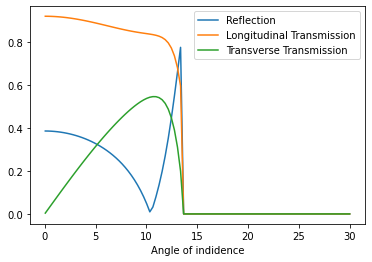

In [175]:
c0 = 1490
cL = 6320
cT = 3040


def get_R_TL_TT(theta):
    theta_L = np.arcsin(np.sin(theta)/c0*cL)
    theta_T = np.arcsin(np.sin(theta)/c0*cT)

    a = np.array([[-np.cos(theta),-np.cos(theta_L), np.sin(theta_T)],
                [-np.sin(theta), np.sin(theta_L), np.cos(theta_T)],
                [0,cT/cL*np.sin(2*theta_L), np.cos(2*theta_T)]])

    b = np.array([-np.cos(theta), np.sin(theta), 0])

    R, TL, TT = np.linalg.solve(a,b)
    return R, TL, TT

N = 100
theta_s = np.linspace(0.001, 30/180*np.pi, N)
Rs, TLs, TTs = np.zeros(N),np.zeros(N),np.zeros(N)

for i in range(N):
    theta = theta_s[i]
    if np.abs(np.sin(theta)/c0*cL) > 1:
        print(theta)
        break
    R, TL, TT = get_R_TL_TT(theta)
    norm = np.sqrt(R**2+TL**2+TT**2)
    R, TL, TT= R/norm, TL/norm, TT/norm
    Rs[i] = np.abs(R)
    TLs[i] = np.abs(TL)
    TTs[i] = np.abs(TT) 

plt.plot(theta_s/np.pi*180, Rs, label='Reflection')
plt.plot(theta_s/np.pi*180, TLs, label='Longitudinal Transmission')
plt.plot(theta_s/np.pi*180, TTs, label='Transverse Transmission')
plt.legend()

plt.xlabel('Angle of indidence')
plt.savefig('sim.png')